**AUTHOR : Umidjon Sattorov**


Artififcial intelligence model for classifiying and diagnosing the dermatological disarrray called melanoma. This disorder can be commonly seen in variety of human beings aroung the globe and statistically reckoned as one of the most prevalent reason for propping the accidental occurence of disastrous cancer. According to several scientific websites that are advent on the worldwide internet, the illustration of this potential can be portrayed like this if observed profoundly.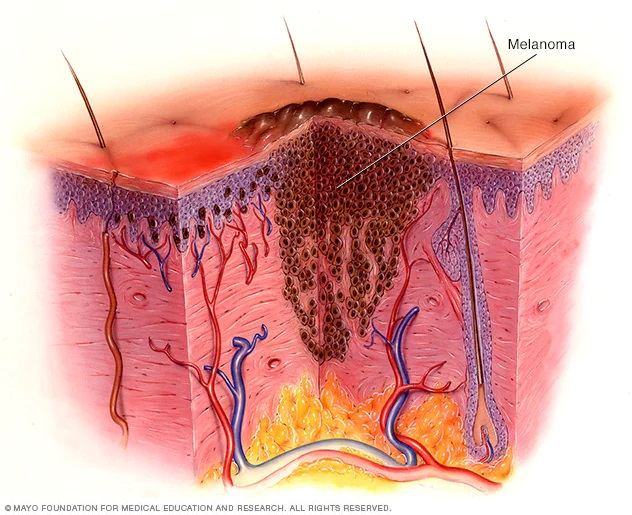

In [1]:
#Importing required packages for inventing artificial intelligence model
import fastai as fst
import pickle
import torch
from fastai.vision.all import *
from ipywidgets import widgets

In [2]:
#Veirifcation if general processing unit is activated
torch.cuda.is_available()

True

In [3]:
#Quick observation of the versions of package in use
print(torch.__version__)
print(fst.__version__)

2.2.1+cu121
2.7.14


**Training our artificial intelligence model for classifications of image usign deep learning algorithms.**

In [4]:
#data path
path = Path('./data/train')
fls = get_image_files(path)
fls

(#14243) [Path('data/train/Melanoma/AUGmented_0_1000.jpeg'),Path('data/train/Melanoma/AUGmented_0_1007.jpeg'),Path('data/train/Melanoma/AUGmented_0_1009.jpeg'),Path('data/train/Melanoma/AUGmented_0_1015.jpeg'),Path('data/train/Melanoma/AUGmented_0_1022.jpeg'),Path('data/train/Melanoma/AUGmented_0_1029.jpeg'),Path('data/train/Melanoma/AUGmented_0_1031.jpeg'),Path('data/train/Melanoma/AUGmented_0_1036.jpeg'),Path('data/train/Melanoma/AUGmented_0_1040.jpeg'),Path('data/train/Melanoma/AUGmented_0_1042.jpeg')...]

Conducting surveillance for verifying if there is any failed or fatally damaged file in database file

In [5]:
failed = verify_images(path)
failed

'WindowsPath' object is not iterable


(#0) []

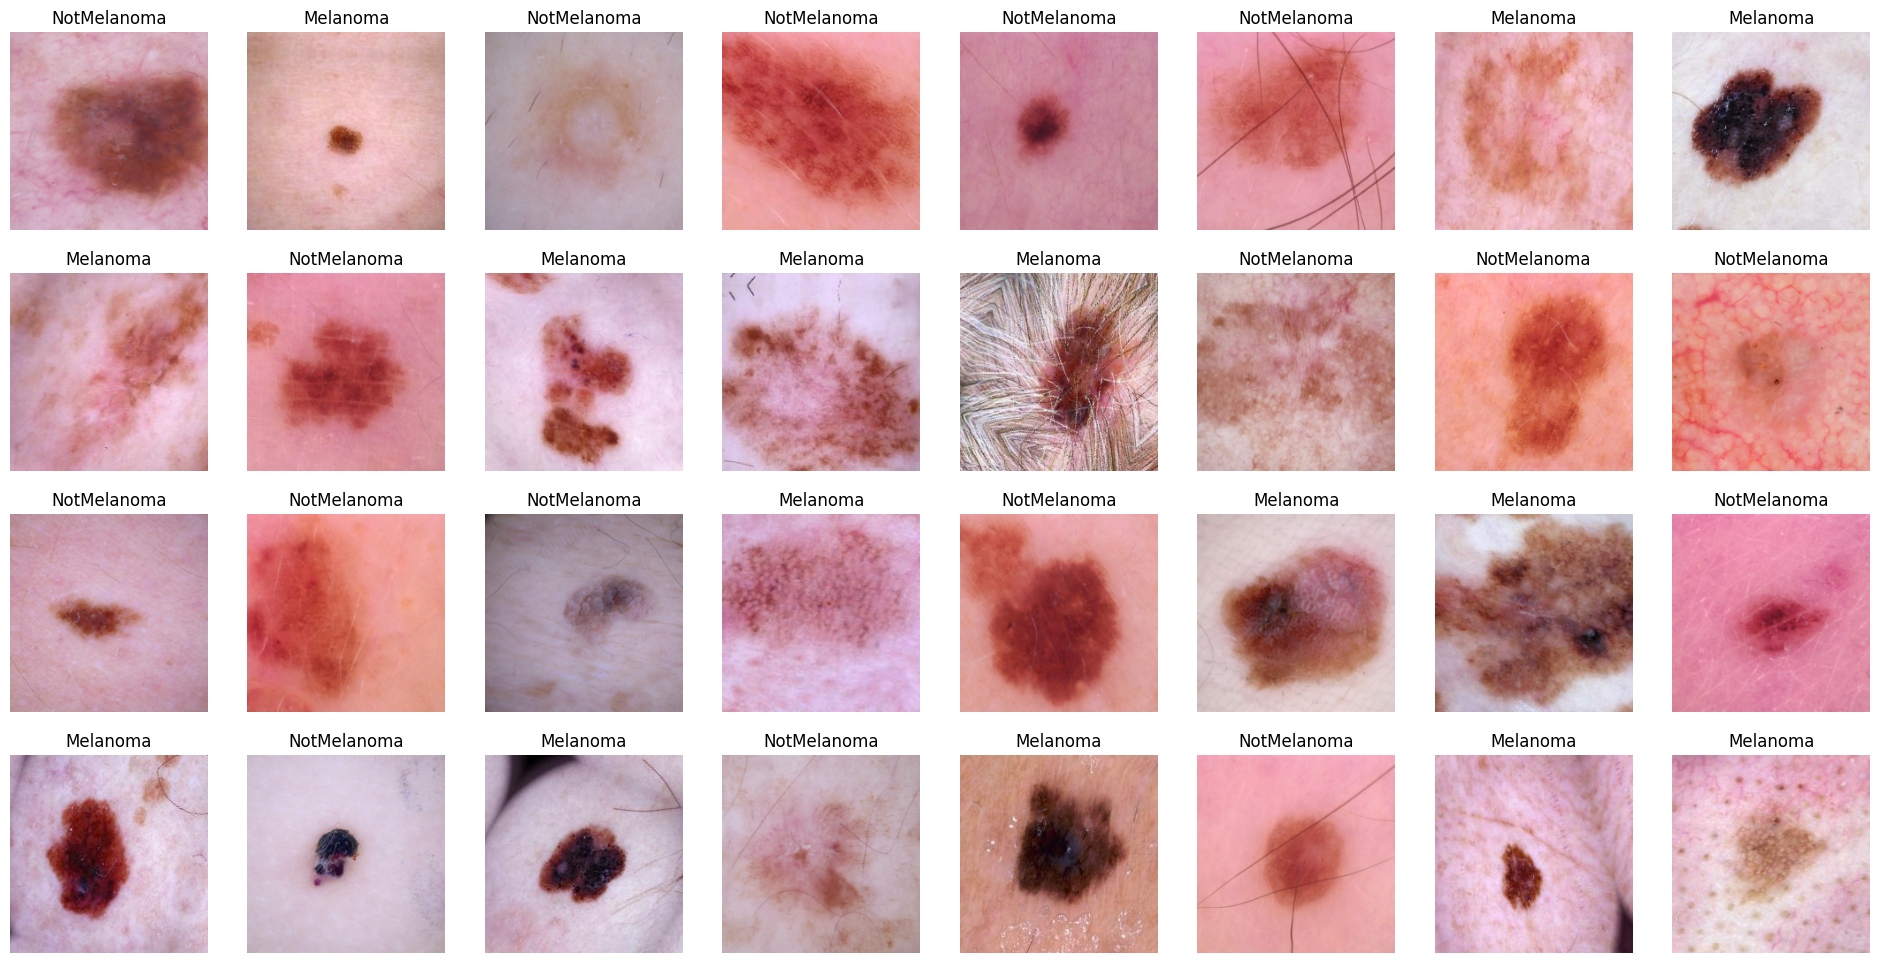

In [6]:
#Data block
disorder = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.25, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#DataLoaders
dls = disorder.dataloaders(path)

#Verify dataset
dls.train.show_batch(max_n = 32, nrows = 4)

**Training our model**

In [7]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(2)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.354149,0.215645,0.917416,02:48


epoch,train_loss,valid_loss,accuracy,time
0,0.195460,0.130803,0.946067,02:49
1,0.109744,0.117654,0.949157,02:47


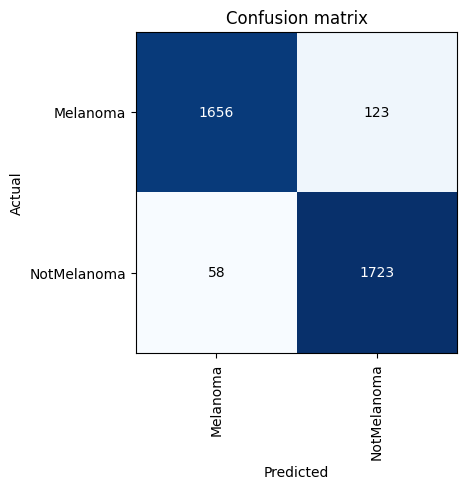

In [8]:
#Verification of model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

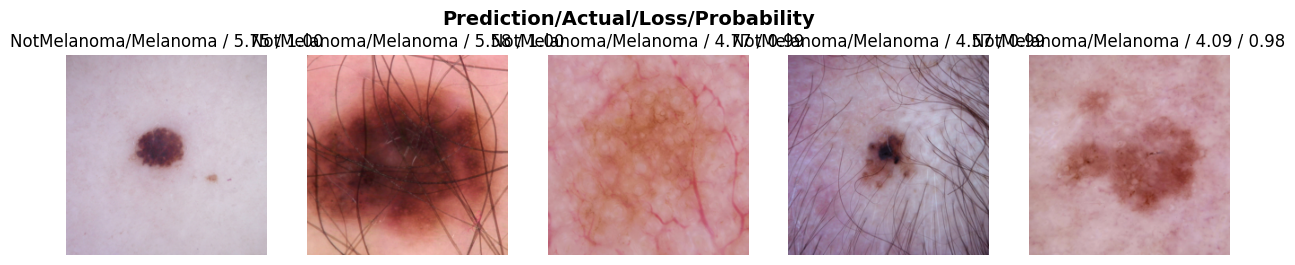

In [9]:
interp.plot_top_losses(5, nrows = 1)

**Evaluation using online method**

In [10]:
upload = widgets.FileUpload()
upload

FileUpload(value=(), description='Upload')

In [11]:
from io import BytesIO

In [12]:
img = PILImage.create(BytesIO(upload.value[-1].content))
pred, pred_id, probs = learn.predict(item = img)
print(f"Prediction Element : {pred}")
print(f"Probability rate : {probs[pred_id]}")
img


IndexError: tuple index out of range

Preserving artificial intelligence model for future purposes.

In [14]:
with open(file = 'dct.pck', mode = 'wb') as file:
    pickle.dump(obj = learn, file = file)